## Task 1.1: First, you need to clean up the data. Each line of the file is a tweet. Throw away all tweets that are retweets (the text starts with RT), and from the text keep only the hashtags (words that start with #) and the handles (words that start with @).

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
pd.set_option('display.max_colwidth', -1)

In [24]:
df_cols = ['Name', 'ScreenName', 'UserID', 'FollowersCount', 'FriendsCount', 'Location', 'Description', 'CreatedAt', 'StatusID', 'Language', 'Place', 'RetweetCount', 'FavoriteCount','Text']
df = pd.read_table("clinton_trump_tweets.txt",encoding="ISO-8859-1",header=None,names=df_cols)

In [25]:
df.head()

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,NaN,0,1,@NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to work on. Exactly as an exhibition should be!
1,Cookie,Cookiemuffen,109945090,2154,2034,The American South,Got married after college. I don't regret starting a family instead of grad school. Proud Deplorable,Wed Oct 26 18:44:08 EEST 2016,791304413923213312,en,NaN,1937,0,RT @wikileaks: New poll puts Pirate Party on course to win Iceland's national elections on Saturday. https://t.co/edTqjeJaQ6
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,NaN,0,0,@gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.
3,Mark Hager,marksnark,167177185,204,448,Pittsburgh,"Hip, trendy, smart, funny, fit, lobbyist. U? Boilerplate: these thoughts are my own, not anyone else's. Hmmmkay?",Wed Oct 26 00:33:20 EEST 2016,791029904733331457,en,NaN,891,0,RT @LOLGOP: ACA needs fixes but know da facts: *70% can get covered in marketplaces for under $75/month *Hikes affect 3% *GOP will uninsu
4,Capitalist Creations,aaronjhoddinott,1191022351,775,154,Canada,"Entrepreneur, startup investor, political junkie, free market supporter, beer connoisseur, dad and dog lover. Also a golf enthusiast despite my lack of skill.",Fri Oct 28 05:05:10 EEST 2016,791823089700962304,en,NaN,7,0,RT @FastCompany: Alphabet shares soar on better-than-expected earnings as mobile video strategy pays off https://t.co/bokbXngMJt https://t.


In [26]:
df.Text[:5].str.split('@')

0    [, NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to work on. Exactly as an exhibition should be!]
1    [RT , wikileaks: New poll puts Pirate Party on course to win Iceland's national elections on Saturday. https://t.co/edTqjeJaQ6]                
2    [, gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.]                                                 
3    [RT , LOLGOP: ACA needs fixes but know da facts:  *70% can get covered in marketplaces for under $75/month  *Hikes affect 3% *GOP will uninsu] 
4    [RT , FastCompany: Alphabet shares soar on better-than-expected earnings as mobile video strategy pays off https://t.co/bokbXngMJt https://t.] 
Name: Text, dtype: object

In [27]:
def dropRT(my_list):
    return my_list[0]=="RT "

In [28]:
df.drop(df[df.Text[:].str.split('@').apply(dropRT)].index,inplace=True)

In [29]:
df.head()

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,NaN,0,1,@NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to work on. Exactly as an exhibition should be!
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,NaN,0,0,@gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.
6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,NaN,0,0,#infosec #Intel #ACM #IEEE Impacts Haswell microarch. Paper proposes mitigations that could prevent BTB-based side https://t.co/DW6vgRAPrv
7,robert2266,robert2266,17101060,845,938,The Universe,The Dark Lord,Fri Oct 28 14:41:06 EEST 2016,791968028191711237,en,NaN,0,0,"Hacked e-mails show Clinton campaigns fears about Sanders | https://t.co/WMyCHuCDIc The Philippine Star (PhilippineStar) October 28, 2"
10,neddyo,neddyo,16818809,1400,379,Long Island and beyond...,"You should be digging it while it's happening - Zappa; I don't know how you do it, man. - Anastasio #minimix #recommNeds #NYCSOTW",Mon Oct 31 08:06:52 EET 2016,792971077836124160,en,NaN,0,1,Hulk smash!


In [30]:
def keepHashOrHandles(my_list):
    newlist=''
    for HashOrHandle in my_list:
        if HashOrHandle.startswith('@'):
            newlist += HashOrHandle + ' '
        if HashOrHandle.startswith('#'):
            newlist += HashOrHandle  + ' '     
    return newlist

In [31]:
df.Text=df.Text.str.split().apply(keepHashOrHandles)
df.shape

(2419436, 14)

In [32]:
df.head()

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,NaN,0,1,@NWAJimmy
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,NaN,0,0,@gaystoner821
6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,NaN,0,0,#infosec #Intel #ACM #IEEE
7,robert2266,robert2266,17101060,845,938,The Universe,The Dark Lord,Fri Oct 28 14:41:06 EEST 2016,791968028191711237,en,NaN,0,0,
10,neddyo,neddyo,16818809,1400,379,Long Island and beyond...,"You should be digging it while it's happening - Zappa; I don't know how you do it, man. - Anastasio #minimix #recommNeds #NYCSOTW",Mon Oct 31 08:06:52 EET 2016,792971077836124160,en,NaN,0,1,


In [33]:
textList=' '.join(df['Text'].tolist())

In [34]:
lessThan20 = pd.Series(textList.split())

In [35]:
g20= lessThan20.value_counts()

## Task 1.2: Remove the hashtags/handles that have been used less than 20 times. Then remove the users that have used less than 20 tweets.

In [36]:
g20.head()

@YouTube            33620
@realDonaldTrump    30125
@HillaryClinton     23095
@                   16248
@FoxNews            11047
dtype: int64

In [37]:
g20_list = g20[g20>=20].index.tolist()

In [38]:
g20_list

['@YouTube',
 '@realDonaldTrump',
 '@HillaryClinton',
 '@',
 '@FoxNews',
 '#WorldSeries',
 '@megynkelly',
 '@CNN',
 '#quote',
 '#news',
 '#MAGA',
 '#Trump',
 '#NowPlaying',
 '@newtgingrich',
 '@seanhannity',
 '@c0nvey',
 '#PJNET',
 '@KellyannePolls',
 '@wikileaks',
 '#ImWithHer',
 '@FBI',
 '@nytimes',
 '@MSNBC',
 '#Hillary',
 '#RallyTogether',
 '#Now',
 '@POTUS',
 '@washingtonpost',
 '#COSProject',
 '@IAMDONMEGA1017',
 '#DOWNLOAD',
 '#ALBUM',
 '#SPOTIFY',
 '@ABC',
 '@jasoninthehouse',
 '@NissanUSA',
 '#HeismanHouse',
 '#Cubs',
 '@Cubs',
 '@JoyAnnReid',
 '#YOUNGMA',
 '@eBay',
 '#tech',
 '@CNNPolitics',
 '#LGBT',
 '@BreitbartNews',
 '#mPLUSPlaces',
 '#',
 '#HillaryClinton',
 '#NoDAPL',
 '@mitchellvii',
 '#Halloween',
 '@GOP',
 '@mike_pence',
 '#CrookedHillary',
 '#education',
 '#halloween',
 '#mPLUSRewards',
 '@kurteichenwald',
 '#armedradio',
 '#tcot',
 '@SpeakerRyan',
 '#armedradio1',
 '@jaketapper',
 '@thehill',
 '#DrainTheSwamp',
 '#TRUMP',
 '#NeverHillary',
 '#jobs',
 '@politico',
 

In [39]:
def removeLess20(my_list,workList):
    for HashOrHandle in my_list:
        if HashOrHandle == '@':
            my_list.remove(HashOrHandle) 
        if HashOrHandle not in workList:
            my_list.remove(HashOrHandle)    
    return my_list

In [40]:
df.Text = df.Text.str.split().apply(removeLess20, workList = g20_list)

In [42]:
df.Text[:10]

0     []                                
2     []                                
6     [#infosec, #ACM]                  
7     []                                
10    []                                
12    []                                
13    [@WayneDupreeShow, #climatechange]
18    []                                
20    []                                
21    []                                
Name: Text, dtype: object

In [43]:
df.head()

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,NaN,0,1,[]
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,NaN,0,0,[]
6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,NaN,0,0,"[#infosec, #ACM]"
7,robert2266,robert2266,17101060,845,938,The Universe,The Dark Lord,Fri Oct 28 14:41:06 EEST 2016,791968028191711237,en,NaN,0,0,[]
10,neddyo,neddyo,16818809,1400,379,Long Island and beyond...,"You should be digging it while it's happening - Zappa; I don't know how you do it, man. - Anastasio #minimix #recommNeds #NYCSOTW",Mon Oct 31 08:06:52 EET 2016,792971077836124160,en,NaN,0,1,[]


In [44]:
def ListToString(my_list):      
    return ' '.join(my_list)

In [45]:
df.Text = df.Text.apply(ListToString)

In [46]:
df.head()

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,NaN,0,1,
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,NaN,0,0,
6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,NaN,0,0,#infosec #ACM
7,robert2266,robert2266,17101060,845,938,The Universe,The Dark Lord,Fri Oct 28 14:41:06 EEST 2016,791968028191711237,en,NaN,0,0,
10,neddyo,neddyo,16818809,1400,379,Long Island and beyond...,"You should be digging it while it's happening - Zappa; I don't know how you do it, man. - Anastasio #minimix #recommNeds #NYCSOTW",Mon Oct 31 08:06:52 EET 2016,792971077836124160,en,NaN,0,1,


In [47]:
textList=' '.join(df['Text'].tolist())
check = pd.Series(textList.split())
check.value_counts().head()

@YouTube            33620
@realDonaldTrump    30125
@HillaryClinton     23095
@FoxNews            11047
#WorldSeries        9584 
dtype: int64

In [48]:
users20 = df.groupby('UserID')['Text'].count().sort_values(ascending=False)

In [49]:
users20.head()

UserID
1971604699    3018
1463096012    2654
121403596     2573
15501305      2493
1140594793    2456
Name: Text, dtype: int64

In [50]:
users20_list = users20[users20<20].index.tolist()

In [51]:
users20_list

[146250582,
 21756417,
 101966240,
 15379530,
 17872613,
 169602207,
 20788761,
 15095049,
 17249885,
 122588800,
 231485183,
 122762977,
 231487138,
 165299715,
 231505913,
 169596158,
 15165894,
 17260284,
 13126372,
 1925388241,
 122710601,
 2194093488,
 14949694,
 24080778,
 2056181,
 150421839,
 11752512,
 172082933,
 205018754,
 166717991,
 1704918638,
 241590589,
 150367868,
 16740735,
 101754583,
 16741059,
 23320177,
 16011113,
 1006173626,
 1548177055,
 18153864,
 12970892,
 1144379696,
 2446209019,
 17866745,
 214342828,
 2257464461,
 2312650812,
 15357200,
 14973915,
 15358700,
 14289937,
 21702351,
 2318081653,
 2196521937,
 2312725543,
 142046131,
 17081866,
 24044018,
 237864936,
 22687006,
 17236830,
 142535610,
 14974630,
 22015020,
 176469694,
 2312511794,
 175111392,
 16800163,
 15351445,
 240900228,
 20909870,
 121284043,
 1143163454,
 121289743,
 2361222446,
 1144033710,
 2392172353,
 2392303076,
 17724440,
 159883260,
 14976978,
 15354966,
 17085995,
 1057013972,


In [52]:
df.UserID.head()

0     1519696717
2     1450086582
6     106568768 
7     17101060  
10    16818809  
Name: UserID, dtype: int64

In [53]:
ucheck = pd.Series(df.UserID)

In [54]:
newdf=df.drop(df[ucheck.isin(users20_list)].index)

In [55]:
df[:25]

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,NaN,0,1,
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,NaN,0,0,
6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,NaN,0,0,#infosec #ACM
7,robert2266,robert2266,17101060,845,938,The Universe,The Dark Lord,Fri Oct 28 14:41:06 EEST 2016,791968028191711237,en,NaN,0,0,
10,neddyo,neddyo,16818809,1400,379,Long Island and beyond...,"You should be digging it while it's happening - Zappa; I don't know how you do it, man. - Anastasio #minimix #recommNeds #NYCSOTW",Mon Oct 31 08:06:52 EET 2016,792971077836124160,en,NaN,0,1,
12,Alexandria Taylor,twentythreeofme,163712593,1342,1346,"Portland, Oregon",Activist | Creator | Educator | #FemTube Host | Passion Project: #DisabilitiesOnYT Panels | Want to participate? https://t.co/IYy6JVqmo5,Tue Oct 25 19:41:52 EEST 2016,790956555030061056,en,"PlaceJSONImpl{name='Washington', streetAddress='null', countryCode='US', id='bc3a38d3d5999b4b', country='United States', placeType='admin', url='https://api.twitter.com/1.1/geo/id/bc3a38d3d5999b4b.json', fullName='Washington, USA', boundingBoxType='Polygon', boundingBoxCoordinates=[[Ltwitter4j.GeoLocation;@5ad5215f], geometryType='null', geometryCoordinates=null, containedWithIn=[]}",0,7,
13,Harry Binford,CaptainNormal,2447279666,895,1224,USA,"Proud Christian husband, frequent shooting range attendee, and former law enforcement. Lifetime member of the NRA. Pro-life, Jesus is Lord. America first.",Thu Oct 27 21:44:44 EEST 2016,791712249685676032,en,NaN,0,0,@WayneDupreeShow #climatechange
18,Matthew Carl Barnard,matthewcbarnard,231921777,350,668,"Milwaukee, Wisconsin",Trying to put one foot forward each day towards living my dream. I have thoughts along the way. Enjoy.,Wed Oct 26 04:23:47 EEST 2016,791087900368789504,en,NaN,0,0,
20,mystikal knight,_Poochivicious,235657662,777,3236,On An Ultra Light Beams,my life is currently a master p sneaker,Fri Oct 28 15:04:44 EEST 2016,791973973106057216,en,NaN,0,0,
21,Jim Cook,valukind,201499452,1413,620,New York City,"Internet marketer, college grad, Air Force Vet.Capt.,like people, cats, football,fine dining and helping others to achieve.",Fri Oct 28 03:22:20 EEST 2016,791797209335418880,en,NaN,0,0,


In [56]:
newdf.shape

(1747479, 14)

## Task 2.1: Plot the number of the tweets against top-30 locations with the most tweets.

In [57]:
locationList = newdf['Location'].tolist()
moreThan30 = pd.Series((x for x in locationList))
m30 = moreThan30.value_counts()
top30 = m30[:30]

Text(0, 0.5, 'Tweets')

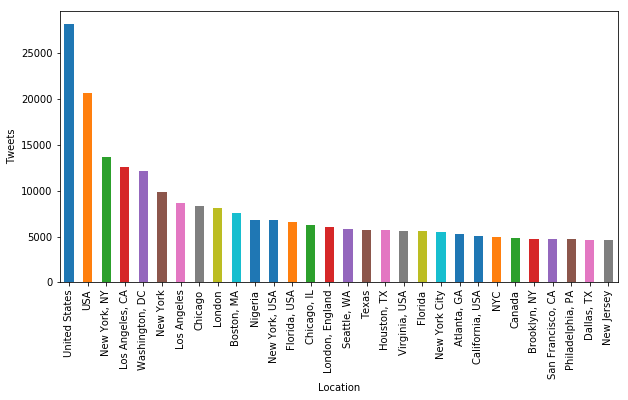

In [58]:
top30.plot(x = 'Location', y=newdf.Location.value_counts(), kind='bar',figsize=(10,5))
plt.xlabel("Location")
plt.ylabel("Tweets")

## Task 2.2: Show the respective tweet word clouds of the top-3 locations with the most tweets.

In [71]:
top30[2:5].index.tolist()

['New York, NY', 'Los Angeles, CA', 'Washington, DC']

In [72]:
wcloud=newdf.set_index('Location')
top3=wcloud.loc[top30[2:5].index.tolist()]
top3textList=' '.join(top3['Text'].tolist())
wordcloud = WordCloud().generate(top3textList)

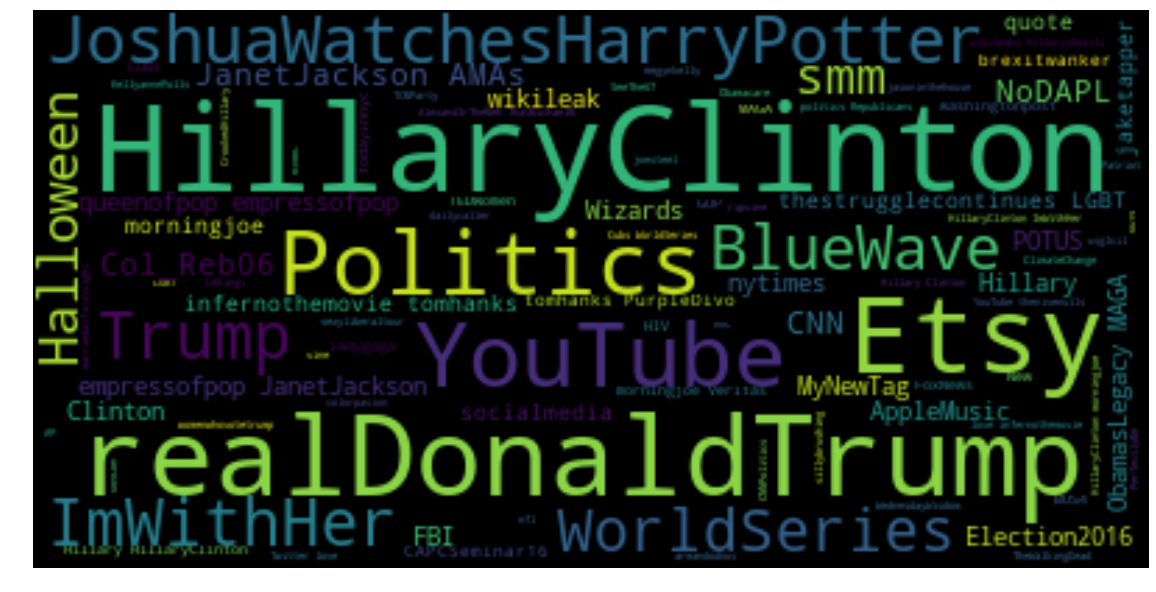

In [73]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')  #  bilinear interpolation performs linear interpolation in 2D space. 
plt.axis("off")
plt.show()

## Task 2.3: Plot the number of the tweets against top-50 users with the most tweets.

In [62]:
top50List = newdf['ScreenName'].tolist()
top50 = pd.Series((x for x in top50List))
t50 = top50.value_counts()
t50 = t50[:50]

Text(0, 0.5, 'Tweets')

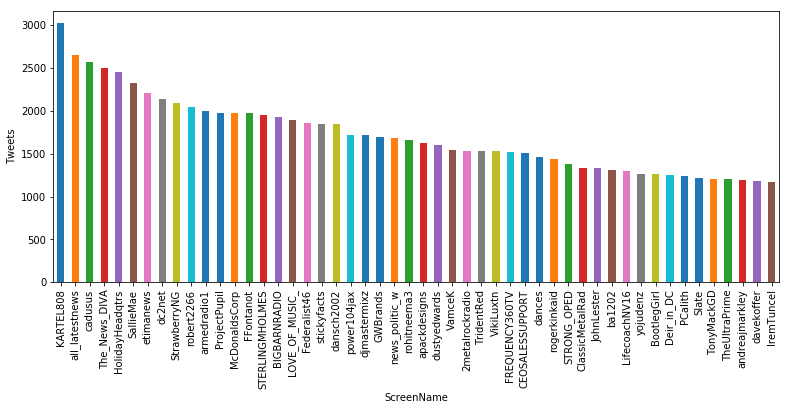

In [63]:
t50.plot(kind='bar',figsize=(13,5))
plt.xlabel("ScreenName")
plt.ylabel("Tweets")

## Task 2.4: Show the respective tweet word clouds of the top-3 users with the most tweets.

In [77]:
t50[2:5].index.tolist()

['cadusus', 'The_News_DIVA', 'HolidayHeadqtrs']

In [ ]:
wcloudu=newdf.set_index('ScreenName')
top3user=wcloudu.loc[t50[2:5].index.tolist()]
top3userList=' '.join(top3user['Text'].tolist())
wordcloud2 = WordCloud().generate(top3userList)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud2, interpolation='bilinear')  #  bilinear interpolation performs linear interpolation in 2D space. 
plt.axis("off")
plt.show()

## Task 2.5: Plot the occurrences of the top-100 most frequent hashtags/handles in the cleaned data

In [67]:
top100=newdf['Text'].tolist()


Text(0, 0.5, 'Frequency')

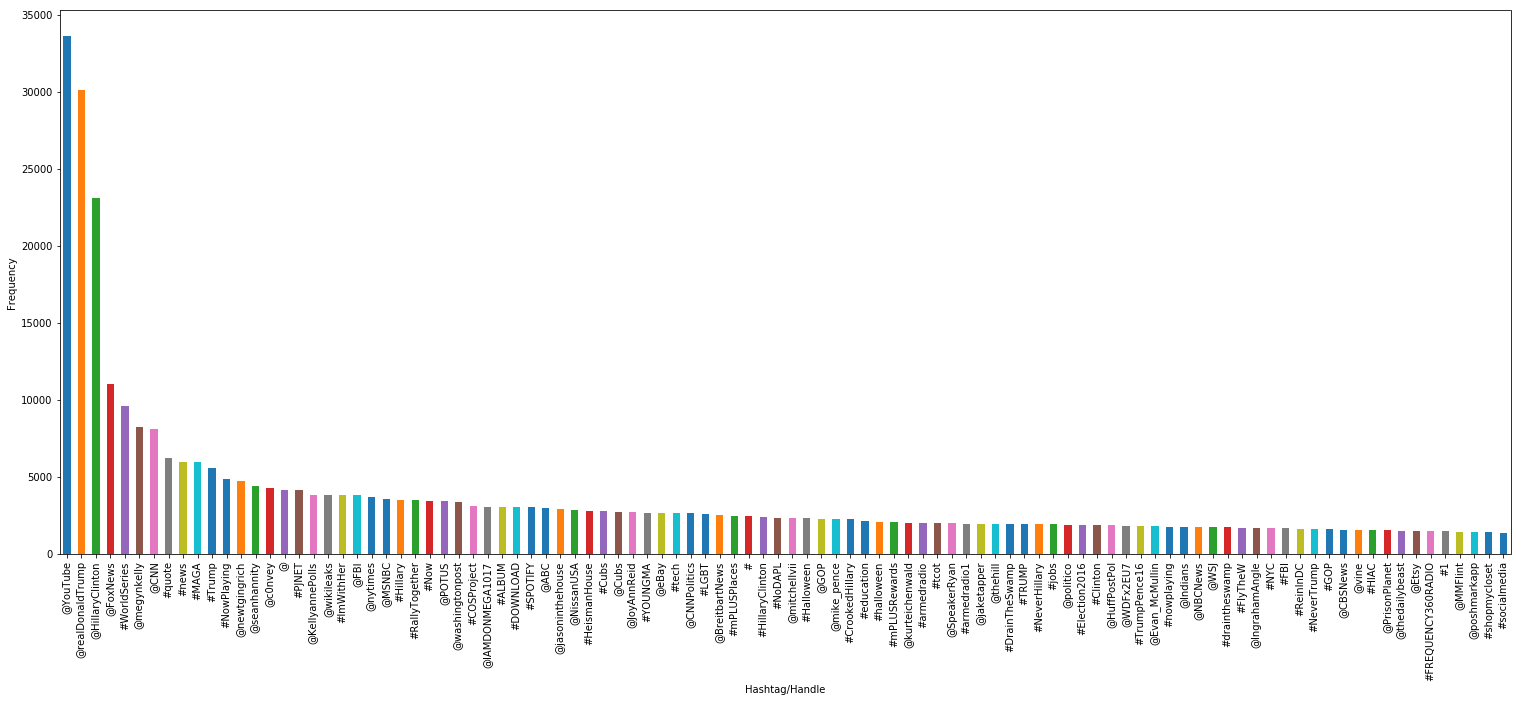

In [76]:

t100x = check.value_counts()[:100]

t100x.plot(kind='bar',figsize=(26,10))
plt.xlabel("Hashtag/Handle")
plt.ylabel("Frequency")

## Task 2.6: Show the tweet word cloud of all the hashtags/handles in the cleaned data

In [69]:
allh=' '.join(newdf['Text'].tolist())
wordcloud4 = WordCloud().generate(allh)

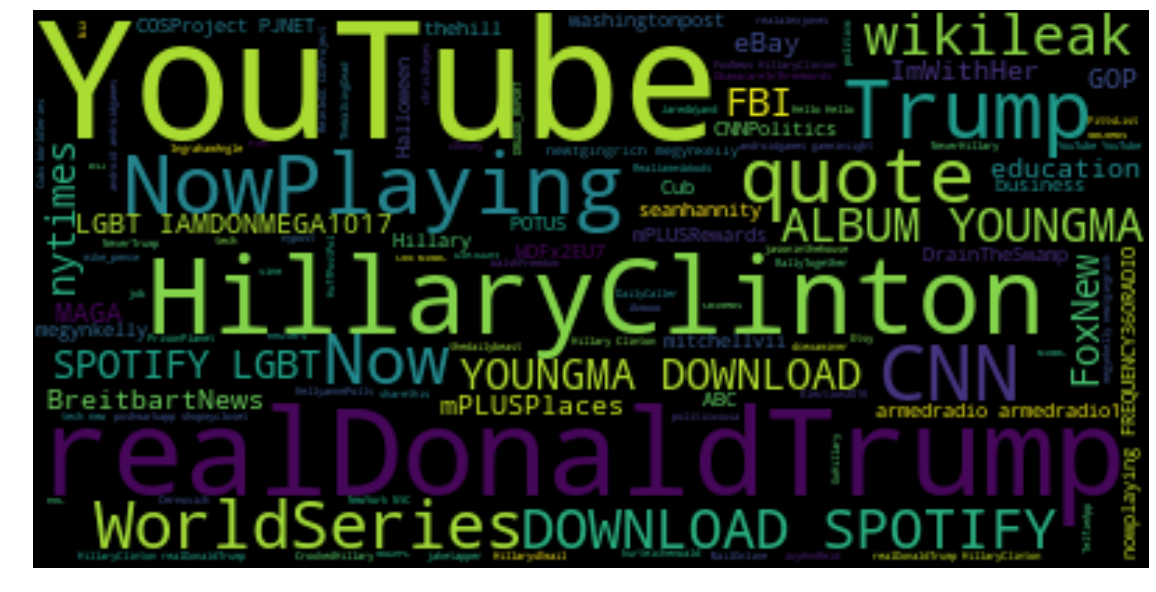

In [70]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud4, interpolation='bilinear')  #  bilinear interpolation performs linear interpolation in 2D space. 
plt.axis("off")
plt.show()